## Contents:
* [Loading packages](#Loading_packages)
* [Read snRNA-seq reference](#read)

* [All subtypes generating UMAP](#allUMAP)
* [Cell type explains 57% of variance in total UMI count and 70% of variance in PC1](#PC1variance)

* [Astro subtypes generating UMAP and supplementary plot](#Fig3A_suppl)

### Loading packages <a class="anchor" id="Loading_packages"></a>

In [1]:
import sys, ast, os
import time
import pickle
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
from plotnine import *
import matplotlib.pyplot as plt 
import matplotlib
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda0,floatX=' + data_type + ',force_device=True'
sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/cell2location/')
sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/cell2location_dev/')

import cell2location

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
from matplotlib import rcParams
import seaborn as sns

# scanpy prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/nfs/users/nfs_v/vk7/.local/lib/python3.7/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
Using cuDNN version 7605 on context None
Mapped name None to device cuda0: Tesla V100-SXM2-32GB (0000:89:00.0)


In [2]:
import sys
print(sys.executable)

/nfs/team283/vk7/software/miniconda3farm5/envs/cellpymcr3/bin/python


`THEANO_FLAGS='force_device=True'` forces the package to use GPU. Pay attention to error messages that might indicate theano failed to initalise the GPU.   
Do not forget to change `device=cuda4` to your available GPU id. Use `device=cuda` / `device=cuda0` if you have just one locally or if you are requesting one GPU via HPC cluster job.

### Read snRNA-seq reference  <a class="anchor" id="read"></a>

In [3]:
results_folder = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/'

reg_mod_name = 'RegressionNBV2Torch_65covariates_40532cells_12819genes'
reg_path = f'{results_folder}regression_model/{reg_mod_name}/'

adata_snrna_raw = sc.read(f'{reg_path}sc.h5ad')
#r = pickle.load(file = open(f'{reg_path}model_.p', "rb"))
#reg_mod = r['mod']

adata_snrna_raw.obs['annotation_1'] = adata_snrna_raw.obs['annotation_1'].astype('category')
adata_snrna_raw.obs['annotation_1_int'] = adata_snrna_raw.obs['annotation_1'].cat.codes.astype('category')
adata_snrna_raw.obs['annotation_1_print'] = [str(adata_snrna_raw.obs['annotation_1_int'][i]) \
                                             + '_' + str(adata_snrna_raw.obs['annotation_1'][i])
                                             for i in range(adata_snrna_raw.shape[0])]

In [4]:
adata_snrna_raw.obs['annotation_1'].value_counts()

Oligo_2           10819
Ext_L56            1422
Inh_4              1389
Ext_L23            1244
Micro              1218
Ext_Thal_1         1197
OPC_1              1015
Ext_Pir             954
Ext_L25             922
Ext_Hpc_DG2         915
Ext_L5_1            893
Unk_1               864
Inh_2               839
Inh_3               818
Inh_Pvalb           804
Ext_Amy_2           797
Inh_Meis2_3         789
Ext_Thal_2          671
Ext_Hpc_CA1         671
Inh_Sst             640
Oligo_1             613
Inh_Meis2_2         602
Inh_1               573
Ext_L6              568
Ext_Hpc_DG1         554
Inh_Vip             545
Ext_Amy_1           519
Astro_AMY           498
Inh_6               467
Astro_HYPO          451
Astro_CTX           443
Ext_Unk_3           416
Astro_THAL_med      405
Inh_Meis2_1         363
Ext_L6B             356
Astro_THAL_lat      332
Inh_Lamp5           331
OPC_2               300
Astro_AMY_CTX       279
Ext_ClauPyr         272
LowQ_2              265
Astro_HPC       

In [5]:
adata_snrna_raw.obs['broad_class'] = adata_snrna_raw.obs['annotation_1'].astype(str).copy()#'Glial'

adata_snrna_raw.obs['broad_class'][['Astro' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Astrocytes'
adata_snrna_raw.obs['broad_class'][['Inh_' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Inhibitory'
adata_snrna_raw.obs['broad_class'][['Ext_' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Excitatory'

adata_snrna_raw.obs['broad_class'][['OPC_1' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Oligo_OPC'
adata_snrna_raw.obs['broad_class'][['OPC_2' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Oligo_OPC'
adata_snrna_raw.obs['broad_class'][['Oligo_1' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Oligo_OPC'
adata_snrna_raw.obs['broad_class'][['Oligo_2' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Oligo_OPC'

adata_snrna_raw.obs['broad_class'][['Micro' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Micro'

adata_snrna_raw.obs['broad_class'][['Unk_1' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Other'
adata_snrna_raw.obs['broad_class'][['Unk_2' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Other'
adata_snrna_raw.obs['broad_class'][['Nb_1' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Other'
adata_snrna_raw.obs['broad_class'][['Nb_2' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Other'
adata_snrna_raw.obs['broad_class'][['LowQ_1' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Other'
adata_snrna_raw.obs['broad_class'][['LowQ_2' in i for i in adata_snrna_raw.obs['annotation_1']]] = \
'Other'

adata_snrna_raw.obs['broad_class'].unique()

array(['Excitatory', 'Oligo_OPC', 'Astrocytes', 'Inhibitory', 'Micro',
       'Other', 'Endo'], dtype=object)

### All subtypes generating UMAP <a class="anchor" id="allUMAP"></a>

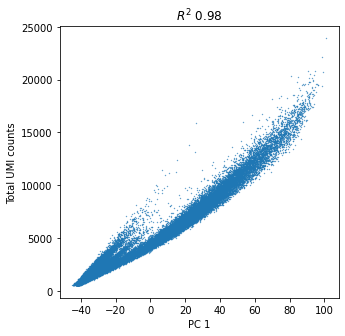

In [6]:
#########################
adata_snrna_raw.X = adata_snrna_raw.raw.X.copy()
sc.pp.log1p(adata_snrna_raw)

sc.pp.scale(adata_snrna_raw, max_value=10)
sc.tl.pca(adata_snrna_raw, svd_solver='arpack', n_comps=80, use_highly_variable=False)
#sc.pl.pca_variance_ratio(adata_snrna_raw, log=True)
#sc.pl.pca(adata_snrna_raw, color=['total_counts'],
#          components=['0,1', '2,3', '4,5', '6,7', '8,9', '10,11', '12,13'],
#          color_map = 'RdPu', ncols = 3, legend_loc='on data',
#          legend_fontsize=10, gene_symbols='SYMBOL')

with matplotlib.rc_context({'axes.facecolor': 'white', 'font.size': 10, 
                            'figure.figsize': [5, 5]}):
    PC1 = adata_snrna_raw.obsm['X_pca'][:, 0].flatten()
    total_UMI = adata_snrna_raw.obs['total_counts'].values.flatten()
    cor = np.corrcoef(PC1, total_UMI)[0, 1]
    
    plt.scatter(PC1, total_UMI,
                s=0.1);
    plt.xlabel('PC 1');
    plt.ylabel('Total UMI counts');
    plt.title(f'$R^2$ {np.round(cor, 2)}')
    
adata_snrna_raw.obsm['X_pca'] = adata_snrna_raw.obsm['X_pca'][:, 1:]
adata_snrna_raw.varm['PCs'] = adata_snrna_raw.varm['PCs'][:, 1:]
#########################

import bbknn
bbknn.bbknn(adata_snrna_raw, neighbors_within_batch = 3, batch_key = 'sample', n_pcs = 79)
sc.tl.umap(adata_snrna_raw, min_dist = 0.8, spread = 1.5)

#########################

### Cell type explains 57% of variance in total UMI count and 70% of variance in PC1  <a class="anchor" id="PC1variance"></a>

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = adata_snrna_raw.obs[['total_counts', 'broad_class']]
df['PC1'] = PC1
df['log_total_counts'] = np.log(df['total_counts'])

UMI_model = ols('total_counts ~ C(broad_class)', data=df).fit()
UMI_table = sm.stats.anova_lm(UMI_model, typ=2)
log_UMI_model = ols('log_total_counts ~ C(broad_class)', data=df).fit()
log_UMI_table = sm.stats.anova_lm(log_UMI_model, typ=2)
PC1_model = ols('PC1 ~ C(broad_class)', data=df).fit()
PC1_table = sm.stats.anova_lm(PC1_model, typ=2)

# compute percent of variance explained by broad cell type
UMI_perc = UMI_table['sum_sq']['C(broad_class)'] / \
(UMI_table['sum_sq']['C(broad_class)'] + UMI_table['sum_sq']['Residual'])
log_UMI_perc = log_UMI_table['sum_sq']['C(broad_class)'] / \
(log_UMI_table['sum_sq']['C(broad_class)'] + log_UMI_table['sum_sq']['Residual'])
PC1_perc = PC1_table['sum_sq']['C(broad_class)'] / \
(PC1_table['sum_sq']['C(broad_class)'] + PC1_table['sum_sq']['Residual'])

UMI_table, log_UMI_table, PC1_table, UMI_perc, log_UMI_perc, PC1_perc

(                      sum_sq       df            F  PR(>F)
 C(broad_class)  2.997447e+11      6.0  8930.608344     0.0
 Residual        2.266952e+11  40525.0          NaN     NaN,
                       sum_sq       df             F  PR(>F)
 C(broad_class)  15064.290938      6.0  13783.264262     0.0
 Residual         7381.903864  40525.0           NaN     NaN,
                       sum_sq       df            F  PR(>F)
 C(broad_class)  3.076188e+07      6.0  15544.30259     0.0
 Residual        1.336637e+07  40525.0          NaN     NaN,
 0.5693807107862632,
 0.6711289406173834,
 0.6971017791039195)

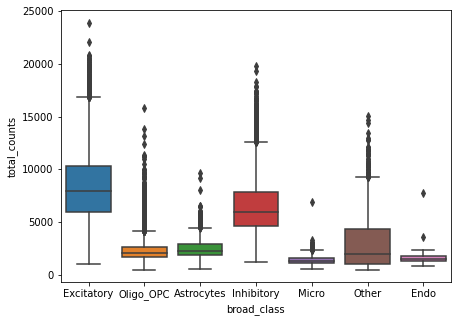

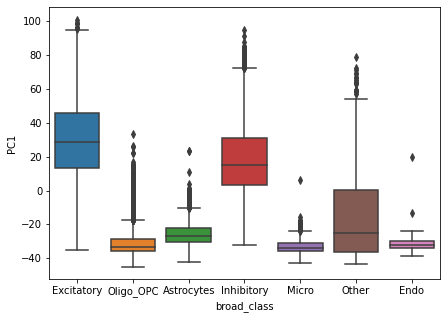

In [8]:
with matplotlib.rc_context({'axes.facecolor': 'white', 'font.size': 10, 
                            'figure.figsize': [7, 5]}):
    
    sns.boxplot(x='broad_class', y='total_counts', data=df)
    plt.show()
    sns.boxplot(x='broad_class', y='PC1', data=df)
    plt.show()

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = adata_snrna_raw.obs[['total_counts', 'annotation_1']]
df['PC1'] = PC1
df['log_total_counts'] = np.log(df['total_counts'])

UMI_model = ols('total_counts ~ C(annotation_1)', data=df).fit()
UMI_table = sm.stats.anova_lm(UMI_model, typ=2)
log_UMI_model = ols('log_total_counts ~ C(annotation_1)', data=df).fit()
log_UMI_table = sm.stats.anova_lm(log_UMI_model, typ=2)
PC1_model = ols('PC1 ~ C(annotation_1)', data=df).fit()
PC1_table = sm.stats.anova_lm(PC1_model, typ=2)

# compute percent of variance explained by broad cell type
UMI_perc = UMI_table['sum_sq']['C(annotation_1)'] / \
(UMI_table['sum_sq']['C(annotation_1)'] + UMI_table['sum_sq']['Residual'])
log_UMI_perc = log_UMI_table['sum_sq']['C(annotation_1)'] / \
(log_UMI_table['sum_sq']['C(annotation_1)'] + log_UMI_table['sum_sq']['Residual'])
PC1_perc = PC1_table['sum_sq']['C(annotation_1)'] / \
(PC1_table['sum_sq']['C(annotation_1)'] + PC1_table['sum_sq']['Residual'])

UMI_table, log_UMI_table, PC1_table, UMI_perc, log_UMI_perc, PC1_perc

(                       sum_sq       df           F  PR(>F)
 C(annotation_1)  3.605738e+11     58.0  1516.95927     0.0
 Residual         1.658661e+11  40473.0         NaN     NaN,
                        sum_sq       df            F  PR(>F)
 C(annotation_1)  17685.465858     58.0  2592.271304     0.0
 Residual          4760.728944  40473.0          NaN     NaN,
                        sum_sq       df            F  PR(>F)
 C(annotation_1)  3.515844e+07     58.0  2735.168172     0.0
 Residual         8.969804e+06  40473.0          NaN     NaN,
 0.6849286985559752,
 0.7879048548851241,
 0.7967332619759833)

### Astro subtypes generating UMAP and supplementary plot  <a class="anchor" id="Fig3A_suppl"></a>

(3013, 7314)


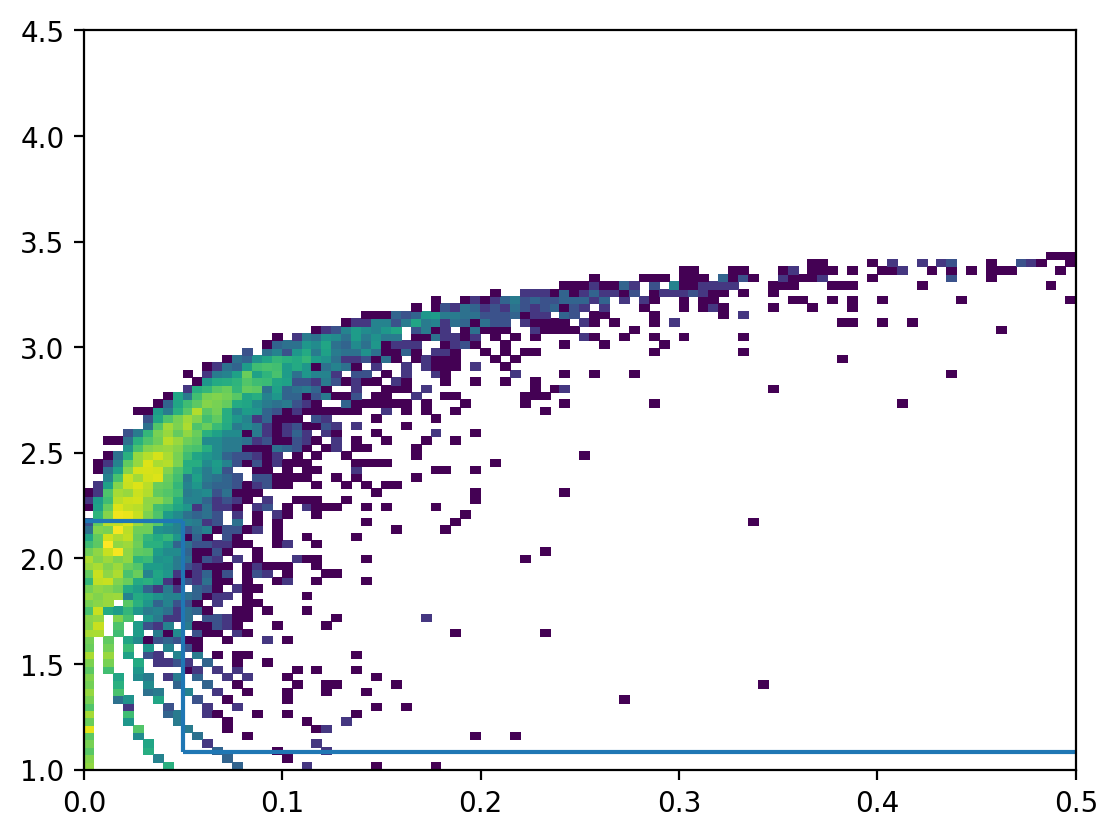

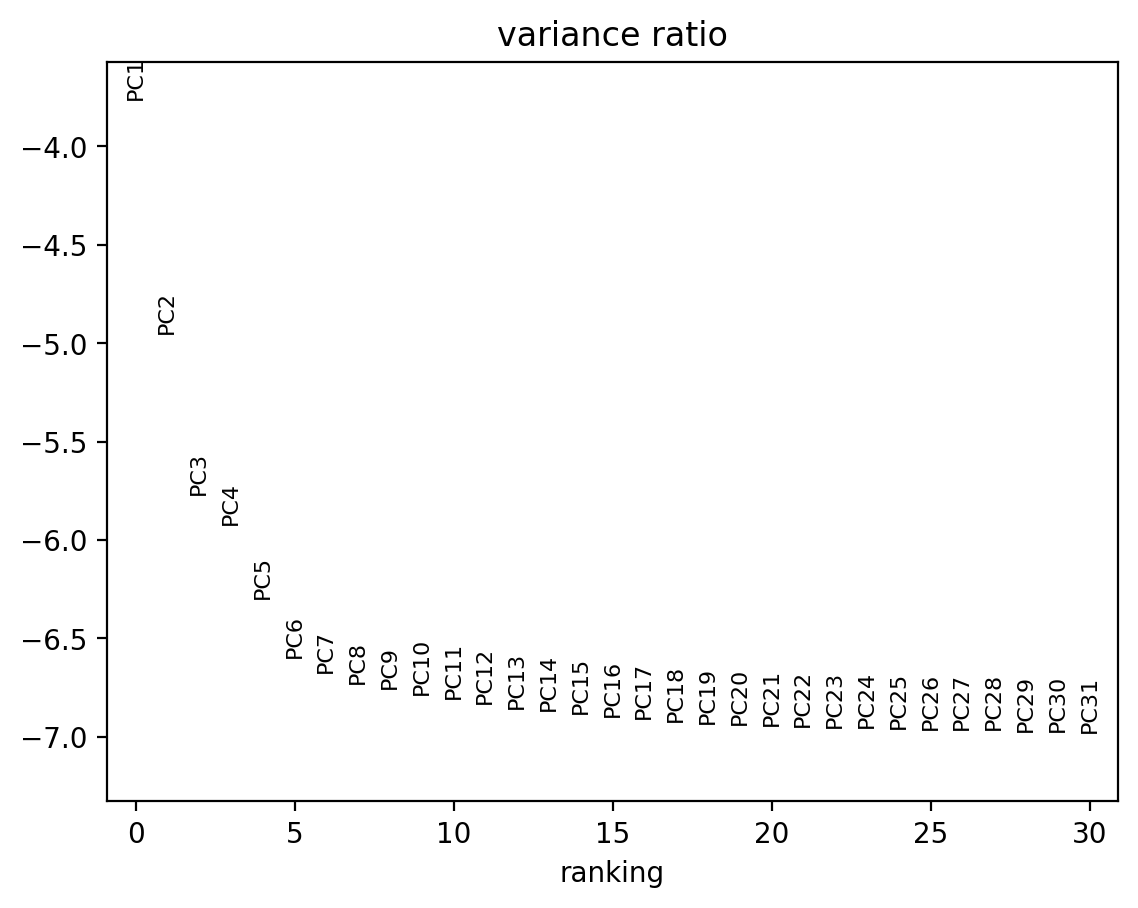

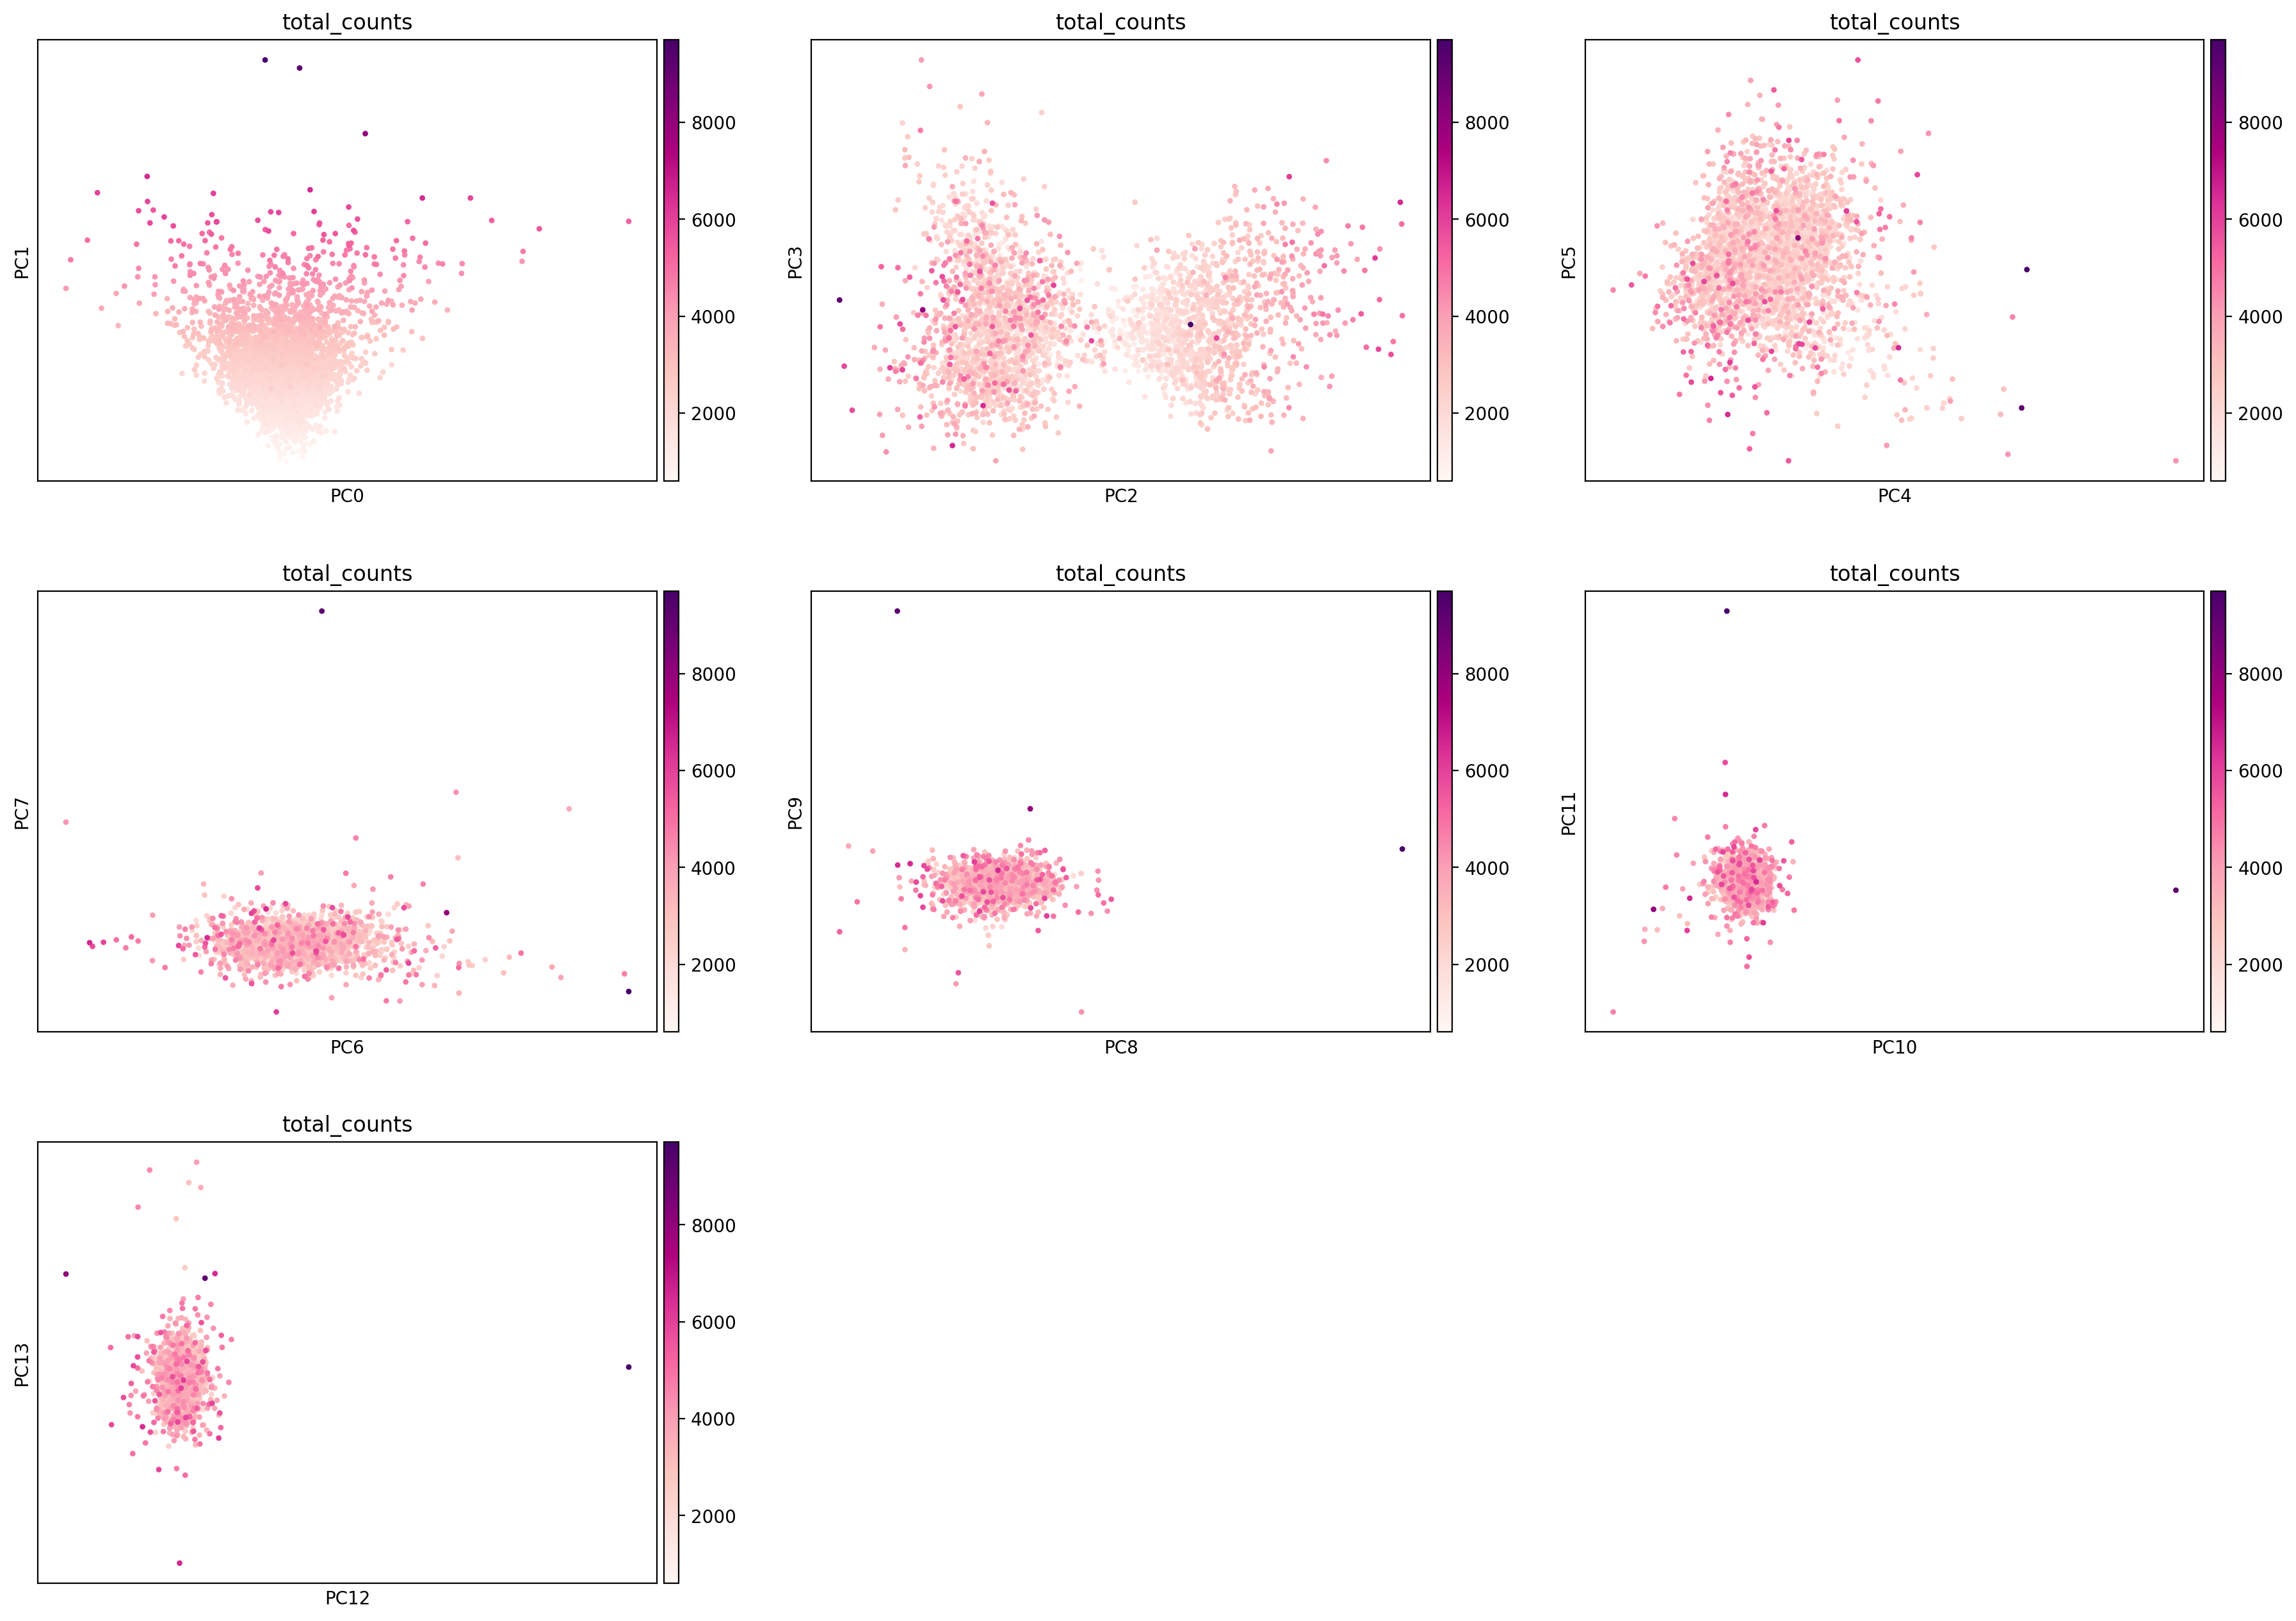

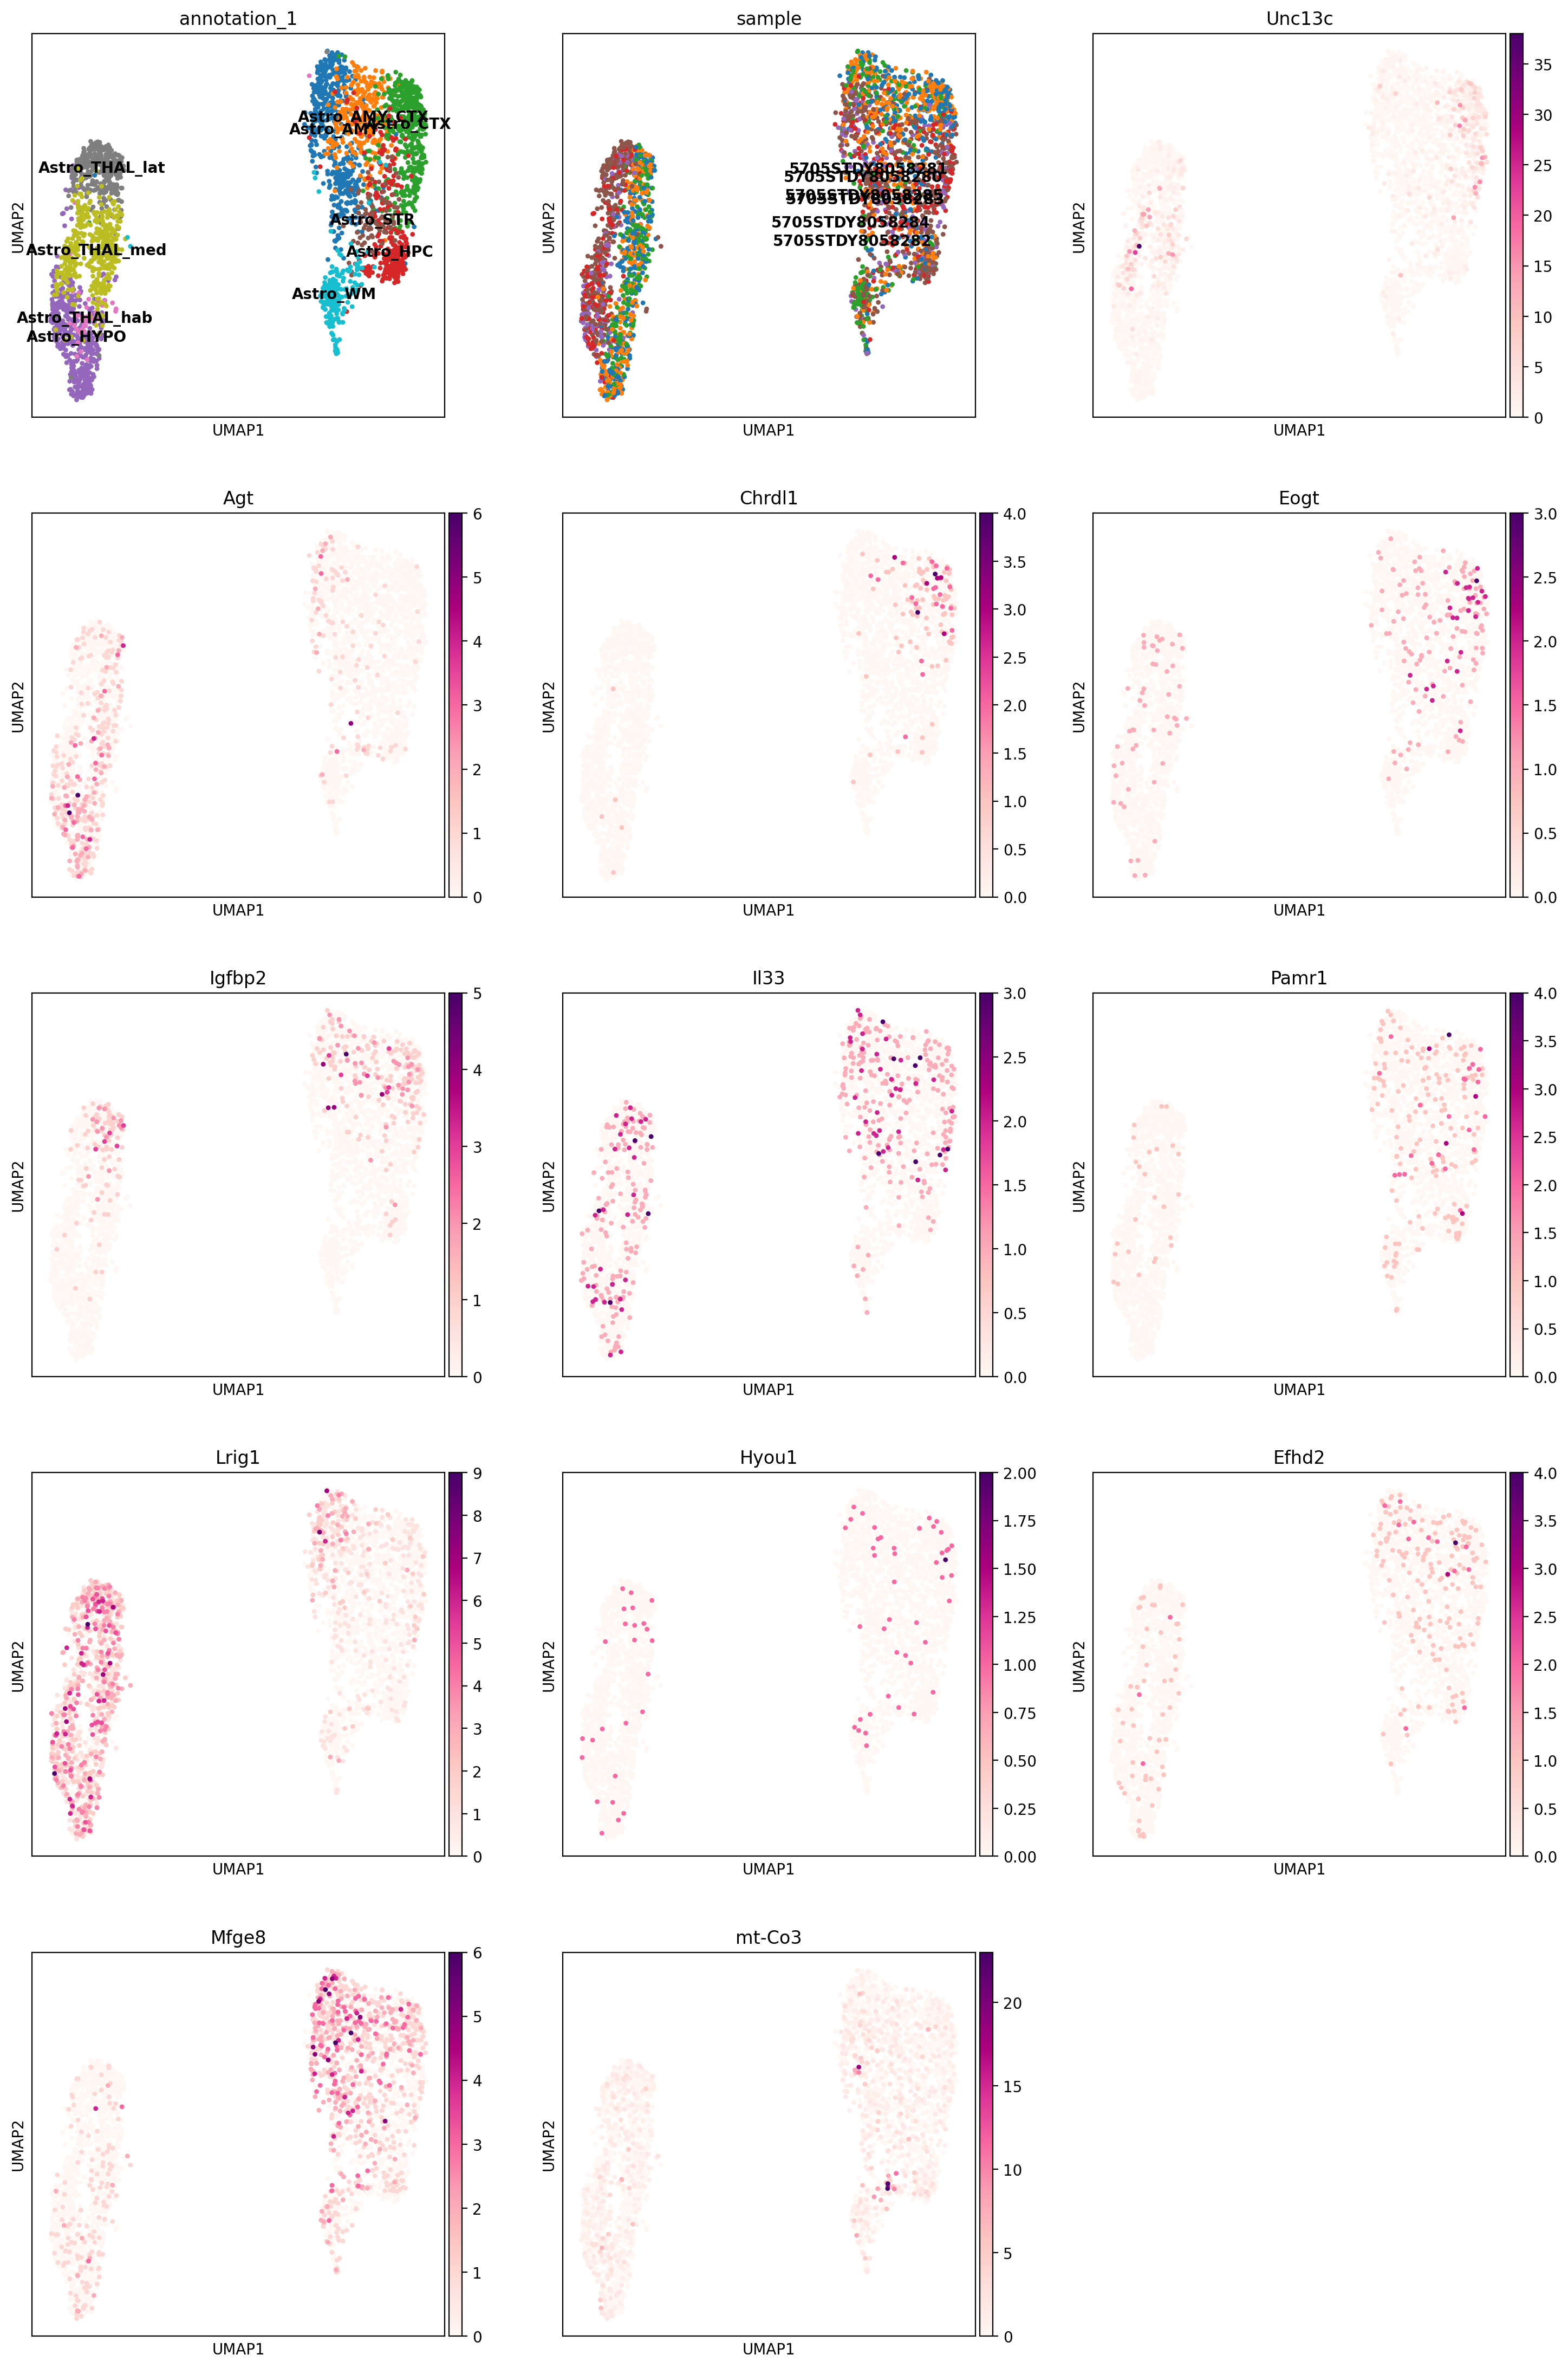

In [14]:
# subset astrocytes
astro_ind = ['Astro_' in i for i in adata_snrna_raw.obs['annotation_1']]
astro = adata_snrna_raw[astro_ind,:].copy()

del astro.uns['log1p']

# keep raw data
astro.X = astro.raw.X.copy()
astro_raw = astro.copy()

# Select cells
#min_genes = 1000  
rcParams["axes.facecolor"] = "white"

sc.pp.filter_cells(astro, min_genes=1)
sc.pp.filter_genes(astro, min_cells=1)

# calculate the mean of each gene across non-zero cells
astro.var['n_cells'] = (astro.X.toarray() > 0).sum(0)
astro.var['nonz_mean'] = astro.X.toarray().sum(0) / astro.var['n_cells']

plt.hist2d(np.log10(astro.var['nonz_mean']),
           np.log10(astro.var['n_cells']), bins=100,
           norm=matplotlib.colors.LogNorm(),
           range=[[0,0.5], [1,4.5]]);
nonz_mean_cutoff = 0.05
cell_count_cutoff = np.log10(astro.shape[0] * 0.004)
cell_count_cutoff2 = np.log10(astro.shape[0] * 0.05)
plt.vlines(nonz_mean_cutoff, cell_count_cutoff, cell_count_cutoff2);
plt.hlines(cell_count_cutoff, nonz_mean_cutoff, 1);
plt.hlines(cell_count_cutoff2, 0, nonz_mean_cutoff);

print(astro[:,(np.array(np.log10(astro.var['nonz_mean']) > nonz_mean_cutoff)
         | np.array(np.log10(astro.var['n_cells']) > cell_count_cutoff2))
      & np.array(np.log10(astro.var['n_cells']) > cell_count_cutoff)].shape)

# select genes based on mean expression in non-zero cells
astro = astro[:,(np.array(np.log10(astro.var['nonz_mean']) > nonz_mean_cutoff)
         | np.array(np.log10(astro.var['n_cells']) > cell_count_cutoff2))
      & np.array(np.log10(astro.var['n_cells']) > cell_count_cutoff)
              & np.array(~astro.var['SYMBOL'].isna())]

#astro.raw = astro
#########################

sc.pp.log1p(astro)
#sc.pp.log1p(astro)

sc.pp.scale(astro, max_value=10)
sc.tl.pca(astro, svd_solver='arpack', n_comps=70, use_highly_variable=False)
sc.pl.pca_variance_ratio(astro, log=True)
sc.pl.pca(astro, color=['total_counts'],
          components=['0,1', '2,3', '4,5', '6,7', '8,9', '10,11', '12,13'],
          color_map = 'RdPu', ncols = 3, legend_loc='on data',
          legend_fontsize=10, gene_symbols='SYMBOL')
astro.obsm['X_pca'] = astro.obsm['X_pca'][:, 1:]
astro.varm['PCs'] = astro.varm['PCs'][:, 1:]
#########################

import bbknn
bbknn.bbknn(astro, neighbors_within_batch = 3, batch_key = 'sample', n_pcs = 30)
sc.tl.umap(astro, min_dist = 0.2, spread = 1.7)

#########################
astro_raw.obsm['X_umap'] = astro.obsm['X_umap']
astro_raw.obsm['X_pca'] = astro.obsm['X_pca']
astro_markers = ['Unc13c', 'Agt', 
                 'Chrdl1', 'Eogt', 'Igfbp2',
                 'Il33', 'Pamr1', 'Lrig1', 'Hyou1',
                 'Efhd2','Mfge8', 'mt-Co3']

rcParams['figure.figsize'] = 5, 5
rcParams["axes.facecolor"] = "white"
sc.pl.umap(astro_raw, color=['annotation_1', 'sample'] + astro_markers,
           color_map = 'RdPu', ncols = 3, legend_loc='on data',
           legend_fontsize=10, gene_symbols='SYMBOL')

In [15]:
astro.obs['annotation_1'].value_counts()

Astro_AMY         498
Astro_HYPO        451
Astro_CTX         443
Astro_THAL_med    405
Astro_THAL_lat    332
Astro_AMY_CTX     279
Astro_HPC         261
Astro_WM          220
Astro_STR          81
Astro_THAL_hab     43
Name: annotation_1, dtype: int64

In [17]:
# save the object with coordinates
adata_snrna_raw.write(f'{reg_path}sc_with_UMAP.h5ad')

adata_snrna_raw_copy = adata_snrna_raw.copy()
# generate a column with unique gene symbols
ens = adata_snrna_raw_copy.var_names.copy()
adata_snrna_raw_copy.var_names = adata_snrna_raw_copy.var['SYMBOL'].astype(str)
adata_snrna_raw_copy.var_names_make_unique()
adata_snrna_raw_copy.var['SYMBOL_unique'] = adata_snrna_raw_copy.var_names
adata_snrna_raw_copy.var_names = ens
adata_snrna_raw_copy.var.index = pd.Index(data=adata_snrna_raw_copy.var['SYMBOL_unique'].to_numpy())
adata_snrna_raw_copy.write(f'{reg_path}mouse_brain_snRNA_with_UMAP_cellxgene.h5ad')
f'{reg_path}mouse_brain_snRNA_with_UMAP_cellxgene.h5ad', f'{reg_path}sc_with_UMAP.h5ad'

('/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/regression_model/RegressionNBV2Torch_65covariates_40532cells_12819genes/mouse_brain_snRNA_with_UMAP_cellxgene.h5ad',
 '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/regression_model/RegressionNBV2Torch_65covariates_40532cells_12819genes/sc_with_UMAP.h5ad')

In [18]:
# save the object with coordinates
astro.write(f'{reg_path}sc_with_UMAP_astrocytes.h5ad')

astro_copy = astro.copy()
# generate a column with unique gene symbols
ens = astro_copy.var_names.copy()
astro_copy.var_names = astro_copy.var['SYMBOL'].astype(str)
astro_copy.var_names_make_unique()
astro_copy.var['SYMBOL_unique'] = astro_copy.var_names
astro_copy.var_names = ens
astro_copy.var.index = pd.Index(data=astro_copy.var['SYMBOL_unique'].to_numpy())
astro_copy.write(f'{reg_path}mouse_brain_snRNA_with_UMAP_astrocytes_cellxgene.h5ad')
f'{reg_path}mouse_brain_snRNA_with_UMAP_astrocytes_cellxgene.h5ad'

'/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/regression_model/RegressionNBV2Torch_65covariates_40532cells_12819genes/mouse_brain_snRNA_with_UMAP_astrocytes_cellxgene.h5ad'

Modules and their versions used for this analysis

In [22]:
import sys
for module in sys.modules:
    try:
        print(module,sys.modules[module].__version__)
    except:
        try:
            if  type(modules[module].version) is str:
                print(module,sys.modules[module].version)
            else:
                print(module,sys.modules[module].version())
        except:
            try:
                print(module,sys.modules[module].VERSION)
            except:
                pass

ipykernel 5.3.4
ipykernel._version 5.3.4
json 2.0.9
re 2.2.1
IPython 7.18.1
IPython.core.release 7.18.1
logging 0.5.1.2
zlib 1.0
traitlets 5.0.4
traitlets._version 5.0.4
argparse 1.1
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
platform 1.0.8
pygments 2.7.1
pexpect 4.8.0
ptyprocess 0.6.0
decorator 4.4.2
pickleshare 0.7.5
backcall 0.2.0
prompt_toolkit 3.0.7
wcwidth 0.2.5
jedi 0.17.2
parso 0.7.1
colorama 0.4.3
ctypes 1.1.0
_ctypes 1.1.0
urllib.request 3.7
jupyter_client 6.1.7
jupyter_client._version 6.1.7
zmq 19.0.2
zmq.backend.cython 40302
zmq.backend.cython.constants 40302
zmq.sugar 19.0.2
zmq.sugar.constants 40302
zmq.sugar.version 19.0.2
jupyter_core 4.6.3
jupyter_core.version 4.6.3
distutils 3.7.8
_curses b'2.2'
dateutil 2.8.1
six 1.15.0
decimal 1.70
_decimal 1.70
scanpy 1.6.0
numpy 1.19.2
numpy.core 1.19.2
numpy.core._multiarray_umath 3.1
numpy.lib 1.19.2
numpy.linalg._umath_linalg b'0.1.5'
scipy 1.5.3
scipy._lib._uarray 0.5.1+49.g4c3f1d7.scipy
anndata 0.7.4
h5py 2.10.0
n